##### Edge Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read the input image in grayscale
image = cv2.imread('../img/sample.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

In [3]:
# Step 2: Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

In [4]:
# Step 3: Apply Canny edge detection
canny_edge = cv2.Canny(image, 100, 200)

In [5]:
# Step 4: Apply Prewitt edge detection (approximation)
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x = cv2.filter2D(image, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, cv2.CV_64F, prewitt_kernel_y)
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)

In [6]:
# Normalize images for better visualization
sobel_edge = cv2.normalize(sobel_edge, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
prewitt_edge = cv2.normalize(prewitt_edge, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

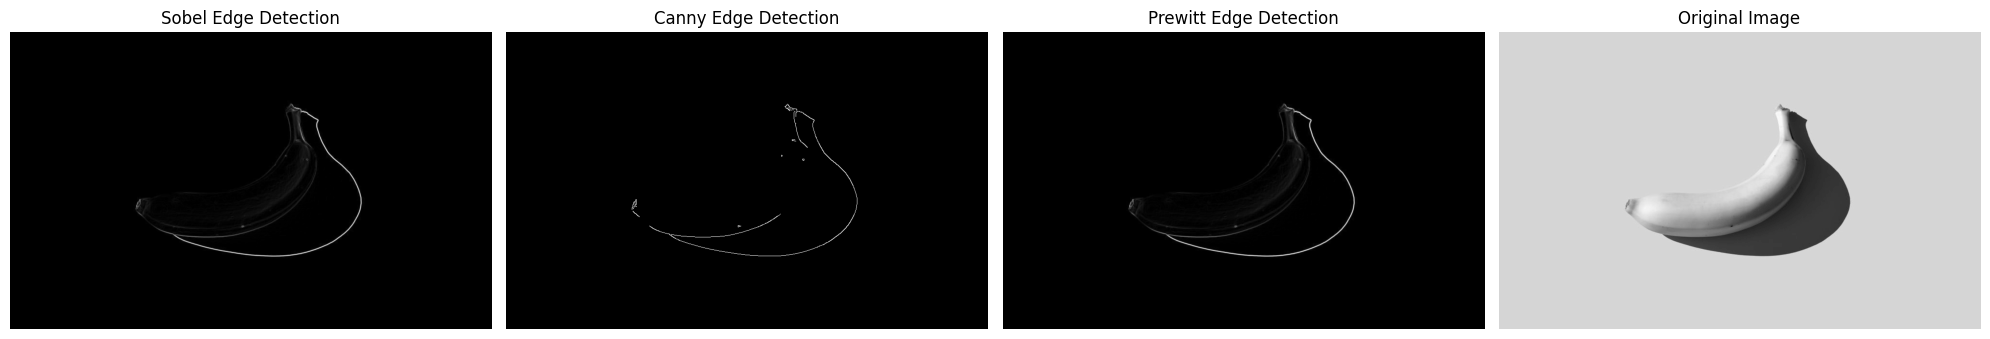

In [7]:
# Step 5: Display the edge-detected images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(sobel_edge, cmap='gray')
axes[0].set_title("Sobel Edge Detection")
axes[0].axis('off')

axes[1].imshow(canny_edge, cmap='gray')
axes[1].set_title("Canny Edge Detection")
axes[1].axis('off')

axes[2].imshow(prewitt_edge, cmap='gray')
axes[2].set_title("Prewitt Edge Detection")
axes[2].axis('off')

axes[3].imshow(image, cmap='gray')
axes[3].set_title("Original Image")
axes[3].axis('off')

plt.tight_layout()
plt.show()